# `Titanic 데이터로 분석 메뉴얼 만들기 - 1`
### 학습 목표 : 데이터 구성을 훑어보고 목적에 따라 바차트를 활용해 시각화하기

https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

### 1. 필수 library import하기

In [2]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 2. 데이터 불러오기

In [102]:
#import train and test CSV files
train = pd.read_csv("../00.DataSet/titanic_train.csv")
test = pd.read_csv("../00.DataSet/titanic_test.csv")

### 3. 데이터 훑어보기
#### 1) `train.info사용해 대략적인 dataframe의 구성 정보 확인하기`
- PassengerId : 승객자 891 명에 대한 정보가 있구나
- Survived : 생존자는 1 아닌 경우는 0으로 설정되어 있음
> <span style="color:blue"> 머신러닝에서 2개를 구분하는 경우 찾으려는 대상이 1이고 그 외는 0으로 놓는다!</span>

In [47]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

#### 2) `value_counts() 활용해 feature별 구성확인하기`
##### - value_counts()를 활용하면 원하는 feature에 집중해 데이터 구성을 확인 할 수 있다.

In [48]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
D48            1
E77            1
B79            1
B71            1
C86            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
# dataset.columns : 해당 데이터프레임의 칼럼만 한 번에 볼 수 있다. 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
"""
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Lifeboat (if survived)
body - Body number (if did not survive and body was recovered)
"""

'\nsurvival - Survival (0 = No; 1 = Yes)\nclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\nname - Name\nsex - Sex\nage - Age\nsibsp - Number of Siblings/Spouses Aboard\nparch - Number of Parents/Children Aboard\nticket - Ticket Number\nfare - Passenger Fare\ncabin - Cabin\nembarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\nboat - Lifeboat (if survived)\nbody - Body number (if did not survive and body was recovered)\n'

In [44]:
# 데이터 프레임의 칼럼과 함께 칼럼의 테이터 타입도 알 수 있어서 유용함. train.columns와 비교
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
"""
DataFrame.count
Count number of non-NA/null observations.

DataFrame.max
Maximum of the values in the object.

DataFrame.min
Minimum of the values in the object.

DataFrame.mean
Mean of the values.

DataFrame.std
Standard deviation of the observations.

DataFrame.select_dtypes
Subset of a DataFrame including/excluding columns based on their dtype.
"""

'\nDataFrame.count\nCount number of non-NA/null observations.\n\nDataFrame.max\nMaximum of the values in the object.\n\nDataFrame.min\nMinimum of the values in the object.\n\nDataFrame.mean\nMean of the values.\n\nDataFrame.std\nStandard deviation of the observations.\n\nDataFrame.select_dtypes\nSubset of a DataFrame including/excluding columns based on their dtype.\n'

In [14]:
# dataset.shape : 해당 데이터프레임의 구성 확인
train.shape

(891, 12)

In [16]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# 결측값 확인
# isnull(dataframe) : feature 별 null값 개수 확인
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 목적에 따라 데이터 시각해보기
#### 1) `성별 생존자 비율 구하기`

여성 생존율: 74.20382165605095
남성 생존율: 18.890814558058924


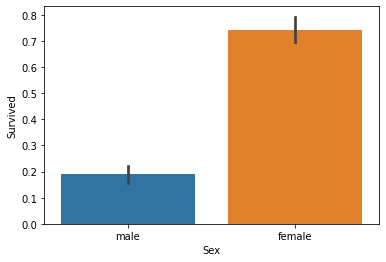

In [23]:
# 시각화로 => 여성이 남성에 비해 월등히 생존율이 높음을 알 수 있다.
sns.barplot(x="Sex", y="Survived", data=train)

# 구체적인 생존 비율 구하기
print("여성 생존율:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("남성 생존율:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

>생존자 구하는 방법은 어떻게 출력되었나?

In [66]:
# 1. 전체 데이터 중에서 사망자 549명 생존자 342명이라는 절대값 확인가능
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
# 2. 생존자와 사망자의 비율을 구하고 싶으면 정규화 작업을 해주면 된다.
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [68]:
# 3. index를 사용해 생존자 비율을 구한다
train["Survived"].value_counts(normalize = True)[1]*100

38.38383838383838

#### 2) `class별 생존자 구하기`
- 결과 : 높은 등급 좌석에 앉은 사람일 수록 생존율이 높다
- 1클래스 vs 2클래스 vs 3클래스 = 62.9% vs. 47.3% vs. 24.2%

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


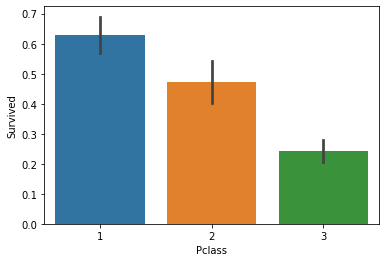

In [42]:
# 등급이 높을 수록 생존율이 높음을 알 수 있다.
# 1클래스에 가까울 수록 비싼 좌석이다.
sns.barplot(x="Pclass", y="Survived", data=train)

# 클래스별 구체적인 생존율 구하기
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


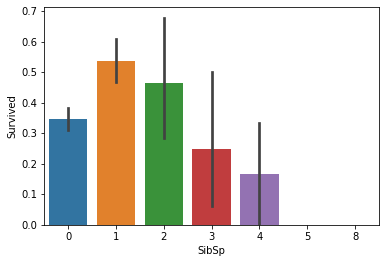

In [74]:
# 같이 탑승한 형제나 배우자 명수에 따른 생존율
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

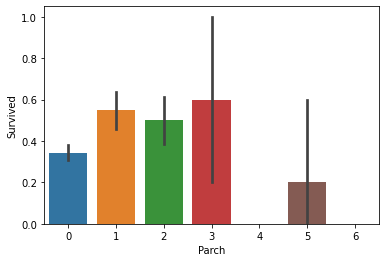

In [77]:
# 같이 탑승한 부모 자식 명수에 따른 생존율
sns.barplot(x="Parch", y="Survived", data=train)

#### 3) `연령별 생존율 확인해보기`
- 연속형데이터를 범주화하여 시각화

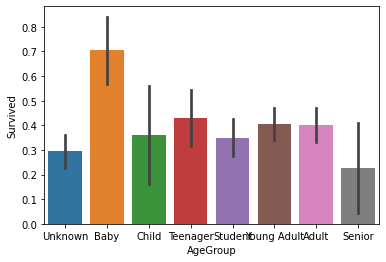

In [113]:
# train 데이터 프레임에 있는 age를 개발자가 직접 grouping해서 visualization하기
# pandas.cut : bins의 데이터에 맞게 데이터를 sort하고자 할 때 사용
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

# Age의 데이터 그룹핑 : -1~0, 0~5, 5~12, 12~18, 18~24, 24~35, 35~60, 60이상
# pd.cut(연속성데이터, grouping범주)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#### 4) `선실을 갖고 있는 사람과 생존율 관계 확인하기`
- 이산형 데이터를 0과 1로 범주화하여 시각화하기
<hr>
1. 이를 시각화 하기 위해서는 선실을 갖고 있는 사람, 갖고 있지 않은 사람을 x축으로 놓아야 한다
2. feature Cabin을 활용해 x축 조건을 만들 수 있다.
3. Cabin에 데이터가 있는 것(=not null)은 선실을 가진 사람, 그렇지 않은 것(=null)은 선실을 갖지 않은 사람이 될 것이다.

Percentage of CabinBool = 1 선실 보유자: 66.66666666666666
Percentage of CabinBool = 0 선실 보유하지 않은 사람: 29.985443959243085


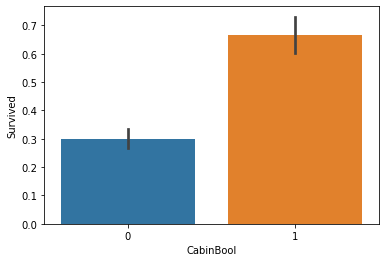

In [98]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 선실 보유자:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 선실 보유하지 않은 사람:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()